<a href="https://colab.research.google.com/github/mmovahed/UDLbook_ResNet/blob/main/ResNet_ODE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/100
313/313 [==============================] - 2s 1ms/step - loss: 0.0596
Epoch 2/100
313/313 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 3/100
313/313 [==============================] - 0s 1ms/step - loss: 2.4119e-04
Epoch 4/100
313/313 [==============================] - 0s 2ms/step - loss: 2.0039e-04
Epoch 5/100
313/313 [==============================] - 0s 1ms/step - loss: 3.0719e-04
Epoch 6/100
313/313 [==============================] - 0s 1ms/step - loss: 1.5945e-04
Epoch 7/100
313/313 [==============================] - 0s 1ms/step - loss: 1.9264e-04
Epoch 8/100
313/313 [==============================] - 0s 1ms/step - loss: 1.5383e-04
Epoch 9/100
313/313 [==============================] - 0s 2ms/step - loss: 5.2374e-05
Epoch 10/100
313/313 [==============================] - 0s 1ms/step - loss: 1.1021e-04
Epoch 11/100
313/313 [==============================] - 0s 2ms/step - loss: 5.6766e-05
Epoch 12/100
313/313 [==============================] - 0s 1

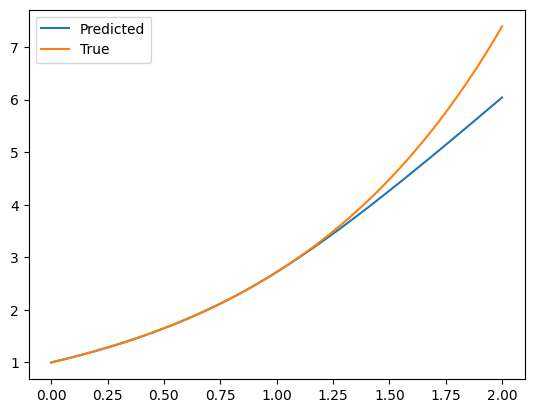

In [10]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

# Define the ODE function
def ode_func(y):
    return y

# Define the residual block
def residual_block(x, units):
    h = keras.layers.Dense(units, activation='elu')(x)
    h = keras.layers.Dense(units, activation=None)(h)
    return keras.layers.add([x, h])

# Build the residual neural network
inputs = keras.layers.Input(shape=(1,))
x = keras.layers.Dense(64, activation='elu')(inputs)
for _ in range(4):
    x = residual_block(x, 64)
outputs = keras.layers.Dense(1)(x)

model = keras.models.Model(inputs=inputs, outputs=outputs)

# Define the loss function
def loss_function(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))

# Compile the model
model.compile(optimizer='adam', loss=loss_function)

# Generate training data
x_train = np.linspace(0, 1, 10000)[:, np.newaxis]
y_train = np.exp(x_train)

# Train the model
model.fit(x_train, y_train, epochs=100)

# Evaluate the model
x_test = np.linspace(0, 2, 10000)[:, np.newaxis]
y_test = model.predict(x_test)

# Plot the results
import matplotlib.pyplot as plt
plt.plot(x_test, y_test, label='Predicted')
plt.plot(x_test, np.exp(x_test), label='True')
plt.legend()
plt.show()
